# Establish CAPEX estimation relationship for a feedstock dryer

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import settings
from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale
from functions.general.curve_fitting import func_straight_line, func_power_curve
from scipy.optimize import curve_fit
from functions.general.curve_fitting import display_curve_fits


### Load data and do some data wrangling

In [2]:
# General parameters
root_dir = get_project_root()
updated_currency = "GBP"
updated_CEPCI_year = 2020
plot_style = settings.plotting.digital

In [3]:
# Load and display data
data_file = "CAPEX_dryer.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df_source = pd.read_csv(data_file_path)
df = df_source.copy()  # working copy of original dataframe

# Convert all values to same currency and update to most recent CEPCI value
CAPEX_currency_scaled = []
CAPEX_currency_CEPCI_scaled = []

for row_no in df.index:
    CAPEX_currency_scaled.append(
        convert_currency_annual_average(value=df["CAPEX"][row_no], year=df["Reference Year"][row_no],
                                        base_currency=df["Currency"][row_no], converted_currency=updated_currency, approximate_rate=True))
    CAPEX_currency_CEPCI_scaled.append(
        CEPCI_scale(base_year=df["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled[row_no]))

# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df[currency_scaled_label] = CAPEX_currency_scaled
df[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

# Also add to original dataframe
df_source[currency_scaled_label] = CAPEX_currency_scaled
df_source[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

df


1 Failed download:
['USDGBP=X']: Exception("%ticker%: Data doesn't exist for startDate = 946684800, endDate = 978220800")
C:\Users\2270577A\Anaconda3\envs\PHD_LCA_TEA_streamlit\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\2270577A\Anaconda3\envs\PHD_LCA_TEA_streamlit\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\TEA\average_annual_currency_conversion.py:32: UserWarning: Current year selected. Hence average up to 2 weeks prior used instead of complete annual average. Consider running analysis based on last year's data instead.
  warnings.warn("Current year selected. Hence average up to 2 weeks prior used instead of complete annual "
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\TEA\scaling.py:91: UserWarning: CEPCI value not 

,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Hot air dryer,6.600000e+06,USD,667.67,2010,USA,0.65,NaN,NaN,"""Techno-economic and environmental evaluation ...",a,True,NaN,4.273419e+06,4.635744e+06
1,Rotary drum dryer + aux,1.792241e+07,USD,8000.00,2016,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Evaluating industrial drying of cellulosic fe...",b,True,NaN,1.326824e+07,1.463499e+07
2,Rotary drum dryer only,2.002205e+06,USD,8000.00,2016,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Evaluating industrial drying of cellulosic fe...",b,NaN,NaN,1.482263e+06,1.634950e+06
3,Dryer,2.428800e+06,USD,700.00,2000,USA,NaN,NaN,NaN,"""Chemical Process Design and Integration, Smit...",c,NaN,NaN,NaN,NaN
4,Dryer + gas filter,2.644800e+06,USD,5590.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.649627e+06,1.682861e+06
5,Dryer + gas filter,2.743600e+06,USD,5880.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.711251e+06,1.745727e+06
6,Dryer + gas blower + gas filter,3.344000e+06,USD,7240.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,2.085735e+06,2.127756e+06
7,Dryer + gas blower + gas filter,1.295040e+07,USD,25000.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.077482e+06,8.240218e+06
8,Dryer + gas blower + gas filter,1.336080e+07,USD,27900.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.333459e+06,8.501352e+06
9,Dryer + gas blower + gas filter,1.391560e+07,USD,29400.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.679501e+06,8.854366e+06


In [4]:
# Remove data points which should be ignored for whatever reason
df = df[df["Ignore"]!= True].copy()


## Plot all data

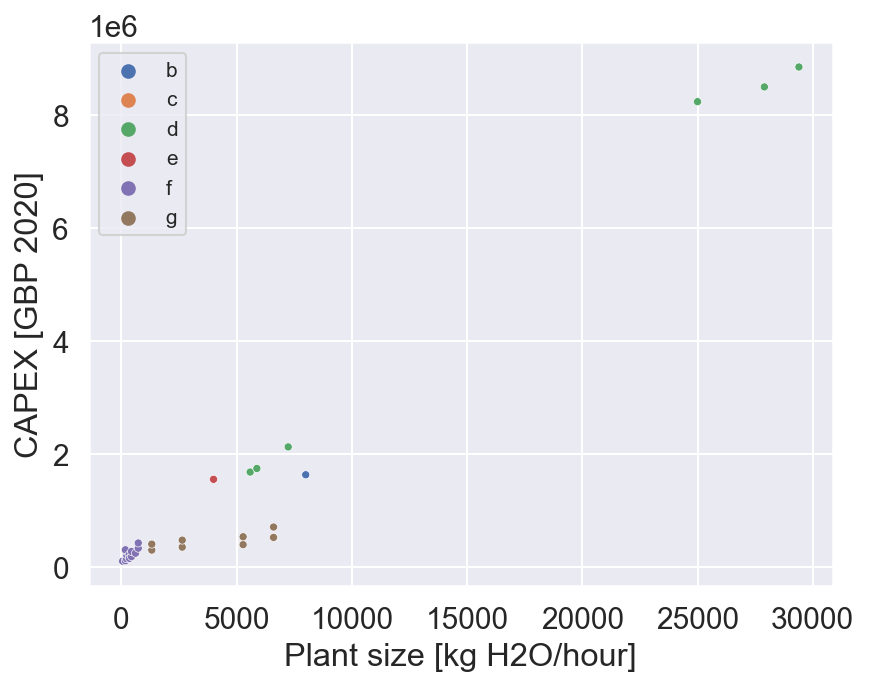

In [5]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df, x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

## Plot plants smaller than 5000 kg H2O/hour

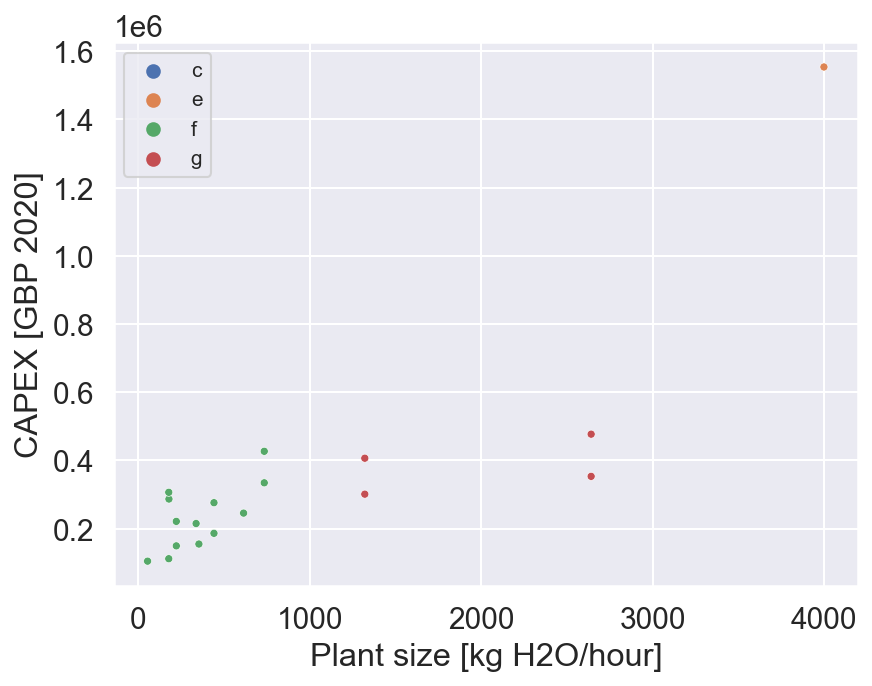

In [6]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Plant size [kg H2O/hour]"] < 5000], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

## Plot plants greater than 5000 kg H2O/hour

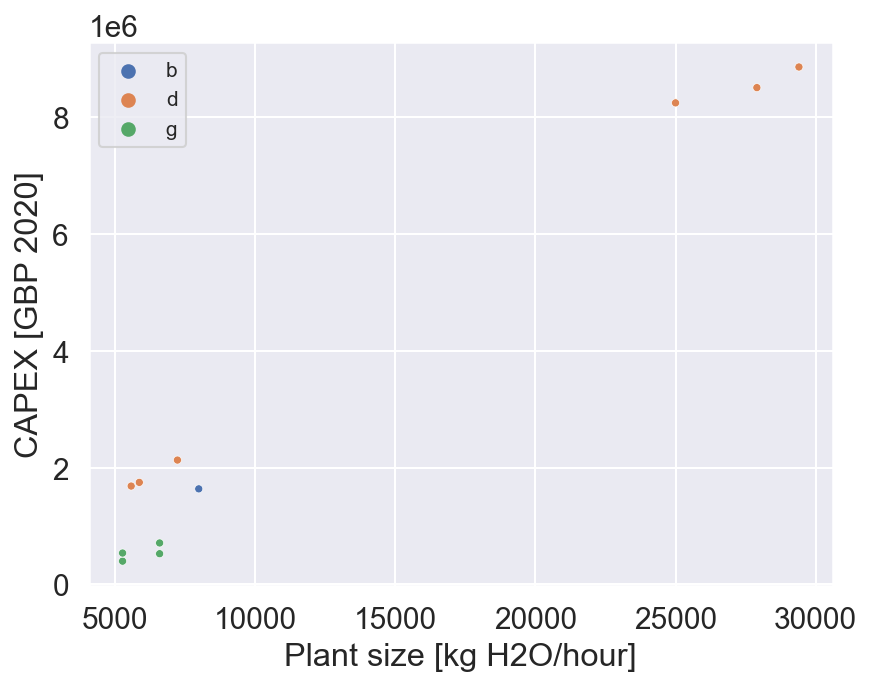

In [7]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Plant size [kg H2O/hour]"] > 5000], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

## Test Cost model purely on data from reference d

### Plot all data

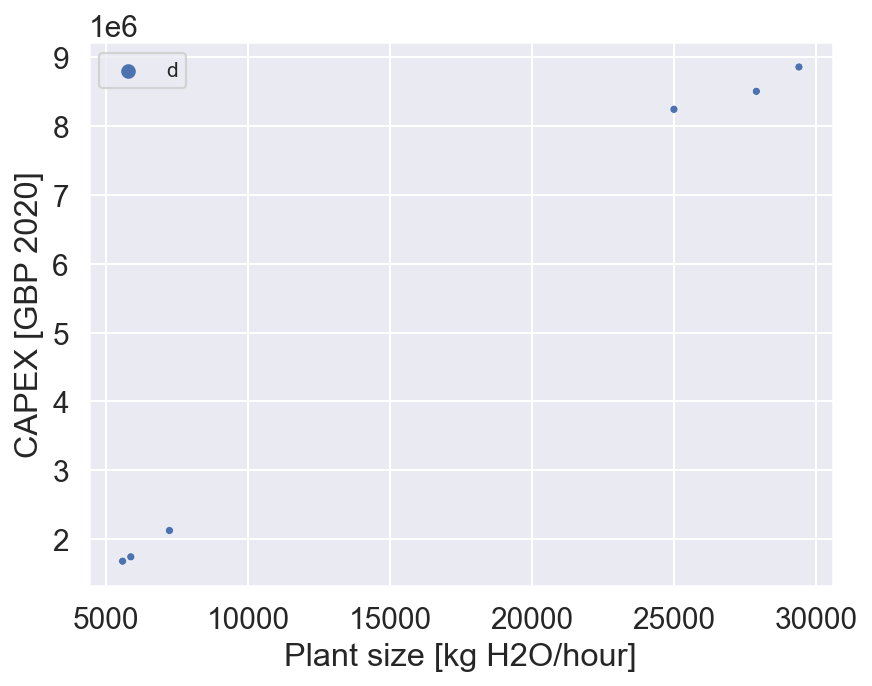

In [8]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Reference_label"]== "d"], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Plot all data smaller than 10,000 kg H2O/hour

C:\Users\2270577A\AppData\Local\Temp\ipykernel_7312\1945426081.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)


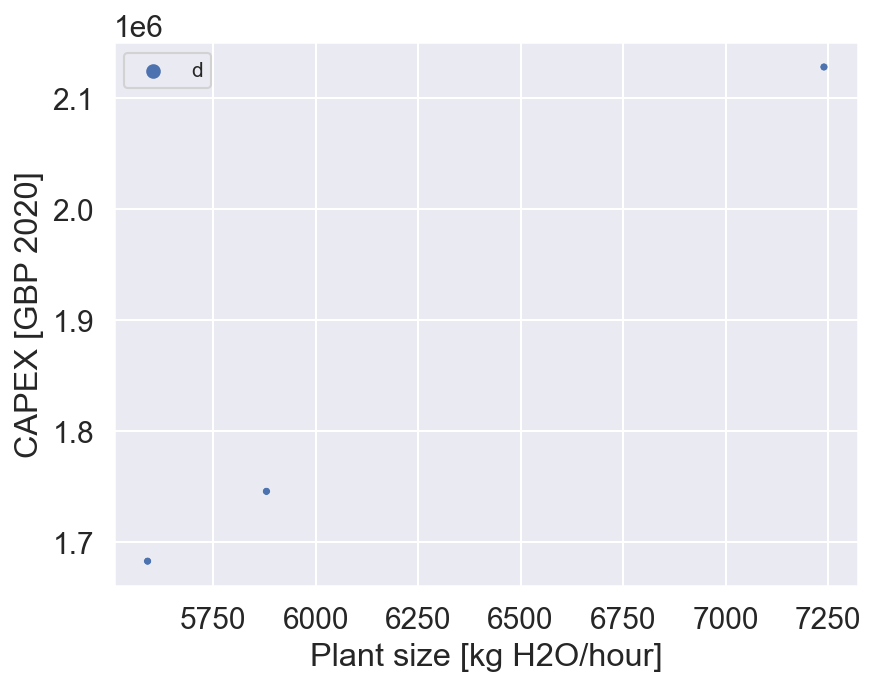

In [9]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Fit curve for small data and plot it

C:\Users\2270577A\AppData\Local\Temp\ipykernel_7312\2737783235.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_data = df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000]["Plant size [kg H2O/hour]"]
C:\Users\2270577A\AppData\Local\Temp\ipykernel_7312\2737783235.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_data = df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000]["CAPEX_GBP_CEPCI_2020"]


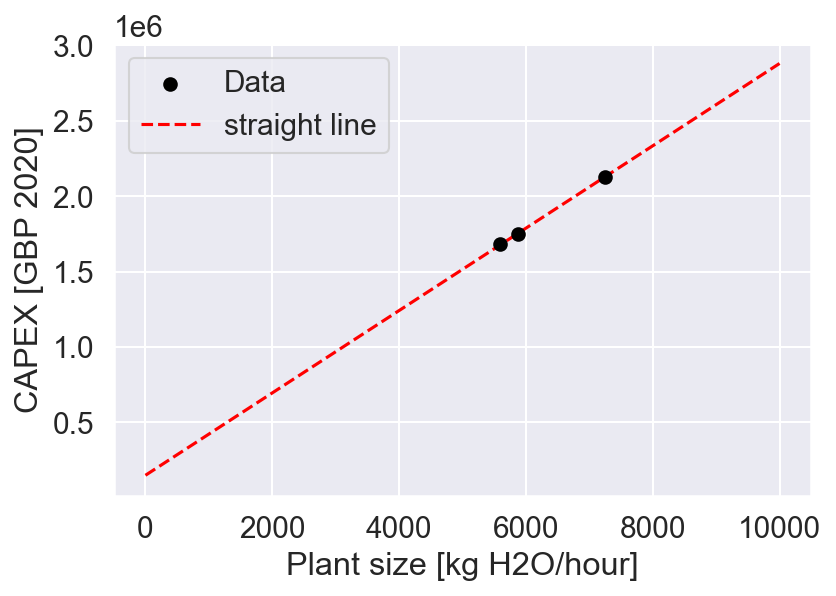

In [10]:
# Fit curve
x_data_range = np.linspace(start=0, stop=10000, num=100)
x_data = df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000]["Plant size [kg H2O/hour]"]
y_data = df[df["Reference_label"]=="d"][df["Plant size [kg H2O/hour]"]<10000]["CAPEX_GBP_CEPCI_2020"]

optimised_constants_straight_line, _ = curve_fit(func_straight_line, x_data, y_data)
y_fit_straight_line_data_range = func_straight_line(x_data_range, *optimised_constants_straight_line)

# Create plot
fig, ax = plt.subplots(dpi=150)
ax.scatter(x_data, y_data, color="black", label="Data", zorder=10)
ax.plot(x_data_range, y_fit_straight_line_data_range, '--', color='red', label="straight line")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend()
plt.show()



In [11]:
# Example CAPEX's based on this relationship
print(f"CAPEX for a size of 0 kg H2O/hour removed: {func_straight_line(0, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 1 kg H2O/hour removed: {func_straight_line(1, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 10 kg H2O/hour removed: {func_straight_line(10, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 50 kg H2O/hour removed: {func_straight_line(50, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 100 kg H2O/hour removed: {func_straight_line(100, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 200 kg H2O/hour removed: {func_straight_line(200, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 2,000 kg H2O/hour removed: {func_straight_line(2000, *optimised_constants_straight_line):.0f} USD (2011)")
print(f"CAPEX for a size of 5,000 kg H2O/hour removed: {func_straight_line(5000, *optimised_constants_straight_line):.0f} USD (2011)")


CAPEX for a size of 0 kg H2O/hour removed: 148536 USD (2011)
CAPEX for a size of 1 kg H2O/hour removed: 148809 USD (2011)
CAPEX for a size of 10 kg H2O/hour removed: 151267 USD (2011)
CAPEX for a size of 50 kg H2O/hour removed: 162193 USD (2011)
CAPEX for a size of 100 kg H2O/hour removed: 175851 USD (2011)
CAPEX for a size of 200 kg H2O/hour removed: 203167 USD (2011)
CAPEX for a size of 2,000 kg H2O/hour removed: 694846 USD (2011)
CAPEX for a size of 5,000 kg H2O/hour removed: 1514313 USD (2011)


### Comment on printed results:
- This method means very small plants are still quite expensive (e.g. 140,000 USD for 1 kg H2O/hour)
- Whereas plants of e.g. 100 kg H2O/hour are barely any more expensive at 175,000 USD

## Test Cost model purely on data from reference f - largest cohesive data set

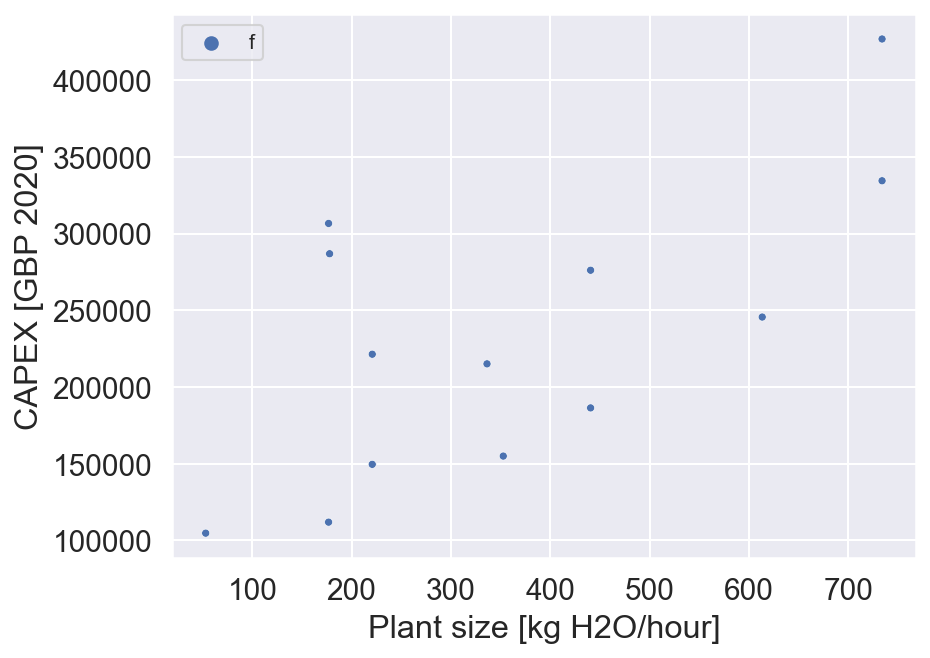

In [12]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Reference_label"]== "f"], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

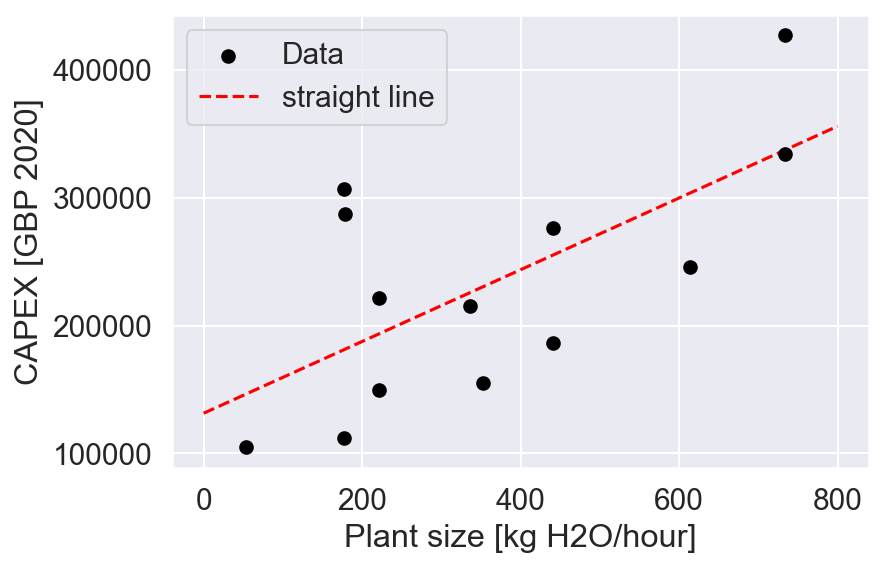

In [13]:
# Fit curve
x_data_range = np.linspace(start=0, stop=800, num=100)
x_data = df[df["Reference_label"]=="f"]["Plant size [kg H2O/hour]"]
y_data = df[df["Reference_label"]=="f"]["CAPEX_GBP_CEPCI_2020"]

optimised_constants_straight_line, _ = curve_fit(func_straight_line, x_data, y_data)
y_fit_straight_line_data_range = func_straight_line(x_data_range, *optimised_constants_straight_line)

# Create plot
fig, ax = plt.subplots(dpi=150)
ax.scatter(x_data, y_data, color="black", label="Data", zorder=10)
ax.plot(x_data_range, y_fit_straight_line_data_range, '--', color='red', label="straight line")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend()
plt.show()



## Test Cost model purely on data from reference g - Vulcan Drying Data


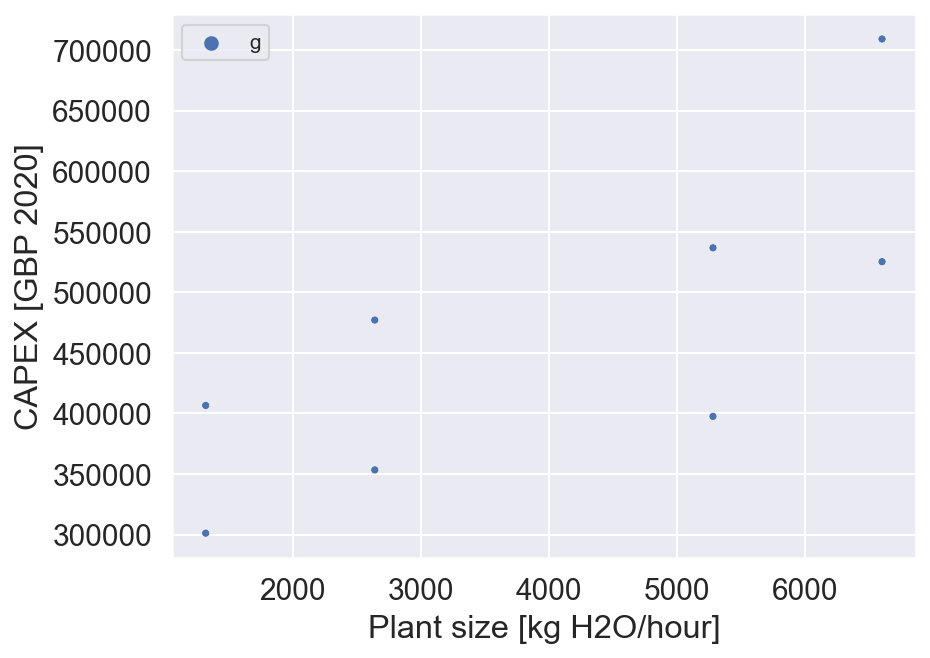

In [14]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df[df["Reference_label"]== "g"], x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

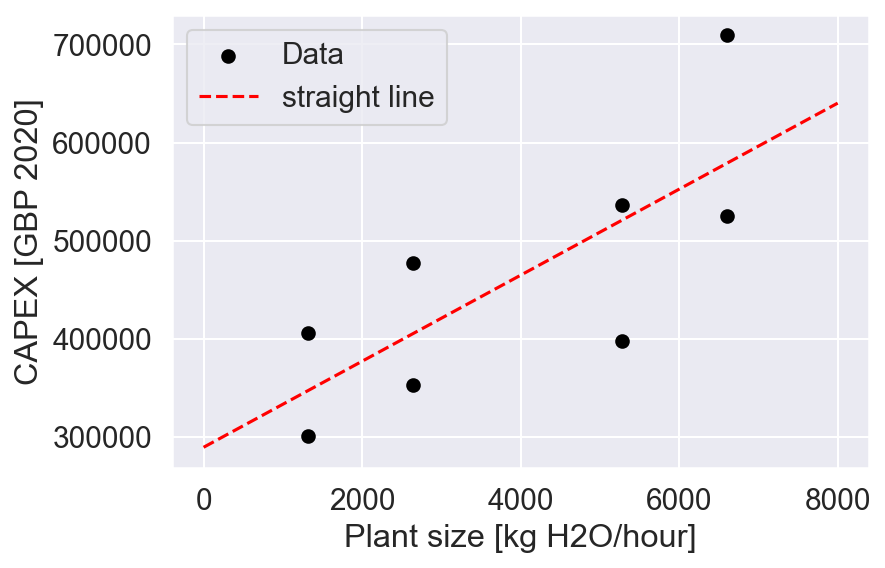

In [15]:
# Fit curve
x_data_range = np.linspace(start=0, stop=8000, num=100)
x_data = df[df["Reference_label"]=="g"]["Plant size [kg H2O/hour]"]
y_data = df[df["Reference_label"]=="g"]["CAPEX_GBP_CEPCI_2020"]

optimised_constants_straight_line, _ = curve_fit(func_straight_line, x_data, y_data)
y_fit_straight_line_data_range = func_straight_line(x_data_range, *optimised_constants_straight_line)

# Create plot
fig, ax = plt.subplots(dpi=150)
ax.scatter(x_data, y_data, color="black", label="Data", zorder=10)
ax.plot(x_data_range, y_fit_straight_line_data_range, '--', color='red', label="straight line")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend()
plt.show()



# Final model

# Plot data for a Capacity of <10,000 kg H2O/hour

In [16]:
df_sub_10000 = df_source.copy()
df_sub_10000 = df_sub_10000[df_sub_10000["Ignore"]!= True].copy()
df_sub_10000 = df_sub_10000[df_sub_10000["Plant size [kg H2O/hour]"]<10000]
df_sub_10000 = df_sub_10000.dropna(subset=['CAPEX_GBP_CEPCI_2020'])
df_sub_10000

,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
2,Rotary drum dryer only,2.002205e+06,USD,8000.00,2016,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Evaluating industrial drying of cellulosic fe...",b,NaN,NaN,1.482263e+06,1.634950e+06
4,Dryer + gas filter,2.644800e+06,USD,5590.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.649627e+06,1.682861e+06
5,Dryer + gas filter,2.743600e+06,USD,5880.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.711251e+06,1.745727e+06
6,Dryer + gas blower + gas filter,3.344000e+06,USD,7240.00,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,2.085735e+06,2.127756e+06
10,Drum dryer,2.116200e+06,USD,4000.00,2004,USA,NaN,NaN,Annual Value of 2.46 * 75000 = 184500 USD conv...,Cost benefit of biomass supply and pre-process...,e,NaN,NaN,1.155018e+06,1.553632e+06
11,Dryer,1.847799e+05,USD,53.16,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,1.008949e+05,1.047701e+05
12,Dryer,1.974407e+05,USD,176.87,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,1.078081e+05,1.119488e+05
13,Dryer,2.639095e+05,USD,220.83,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,1.441019e+05,1.496366e+05
14,Dryer,3.905168e+05,USD,220.83,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,2.132330e+05,2.214228e+05
15,Dryer,5.060460e+05,USD,177.89,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,2.763151e+05,2.869279e+05


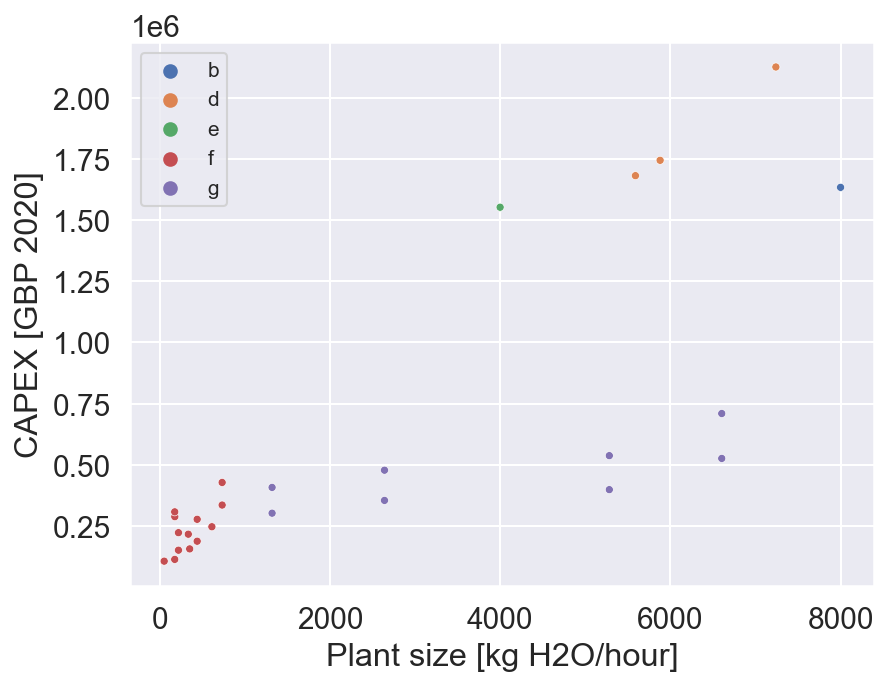

In [17]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_sub_10000, x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

Straight line fit: R2: 0.607; RMSE: 367156; MAPE: 44 %
Power curve fit: R2: 0.609; RMSE: 366495; MAPE: 45 %
2nd degree polynomial fit: R2: 0.610; RMSE: 366062; MAPE: 45 %
3rd degree polynomial: R2: 0.614; RMSE: 364200; MAPE: 43 %


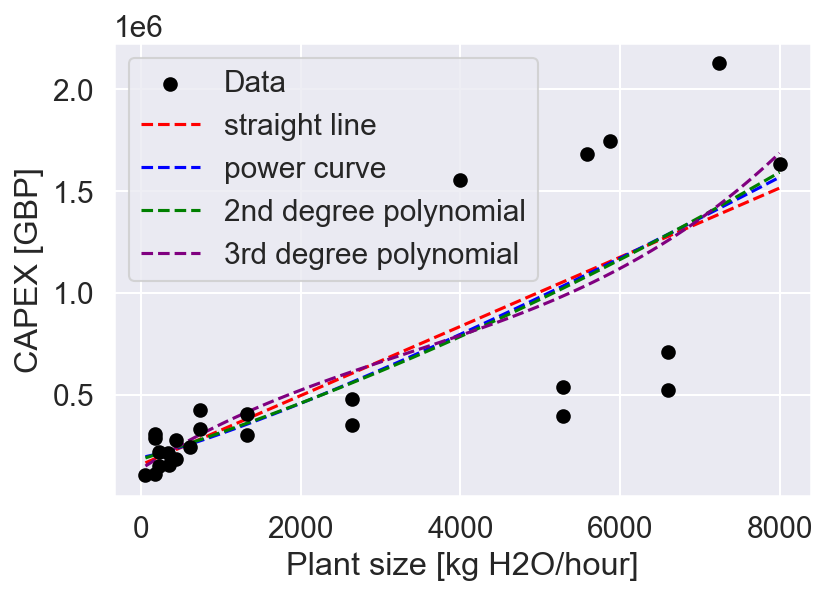

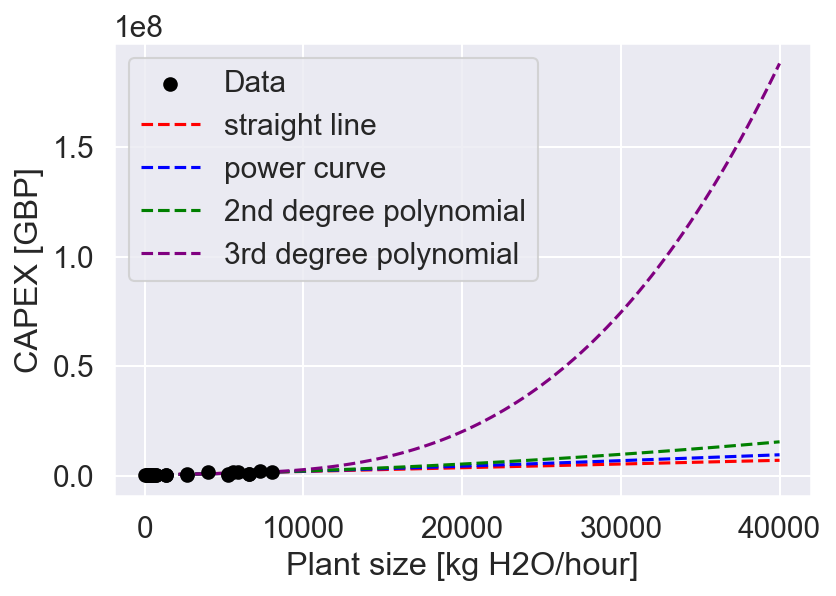

{'straight_line': {'Constants': array([   169.85378412, 156853.88714613]),
  'R2': 0.6073390167927039,
  'RMSE': 367155.65290548763},
 'power_curve': {'Constants': array([3.23859188e+01, 1.18582348e+00, 1.92441580e+05]),
  'R2': 0.6087505370705854,
  'RMSE': 366495.14135250193},
 '2nd_degree_polynomial': {'Constants': array([1.25208444e+02, 6.37598911e-03, 1.83521297e+05]),
  'R2': 0.6096737292493984,
  'RMSE': 366062.4950412111},
 '3rd_degree_polynomial': {'Constants': array([ 2.52256215e+02, -3.69352585e-02,  3.70408453e-06,  1.36925373e+05]),
  'R2': 0.6136354069296364,
  'RMSE': 364200.05285915564},
 'data_range': {'min': 53.16, 'max': 8000.0}}

In [18]:
display_curve_fits(dataframe=df_sub_10000, x_data_label="Plant size [kg H2O/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


- Error is fairly large but linear relationships matches the data reasonably well.
- Especially when using RMSE to account for uncertainty in prediction.
- Could alternatively just use Vulcan Drying data or cluster of data in 0 to 1000 kg H2O/hour region.

# Plot data for a Capacity of <1,000 kg H2O/hour

In [19]:
df_sub_1000 = df_source.copy()
df_sub_1000 = df_sub_1000[df_sub_1000["Ignore"]!= True].copy()
df_sub_1000 = df_sub_1000[df_sub_1000["Plant size [kg H2O/hour]"]<1000]
df_sub_1000 = df_sub_1000.dropna(subset=['CAPEX_GBP_CEPCI_2020'])
df_sub_1000

,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
11,Dryer,184779.8967,USD,53.16,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,100894.946621,104770.126183
12,Dryer,197440.6528,USD,176.87,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,107808.070471,111948.769736
13,Dryer,263909.4955,USD,220.83,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,144101.901434,149636.576480
14,Dryer,390516.7667,USD,220.83,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,213232.981696,221422.847694
15,Dryer,506045.9941,USD,177.89,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,276315.142904,286927.872584
16,Dryer,540862.9828,USD,176.87,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,295326.184035,306669.090999
17,Dryer,379438.6504,USD,336.36,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,207184.023055,215141.560263
18,Dryer,273405.0445,USD,352.72,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,149286.734452,155020.548896
19,Dryer,328795.6985,USD,440.64,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,179531.567242,186427.027158
20,Dryer,487054.8961,USD,440.64,2008,USA,NaN,NaN,Data extracted from figure 3 b). Dryer size es...,"Sultana et al., 2010, ""Development of agri-pel...",f,NaN,10.1016/j.biortech.2010.02.011,265945.476868,276159.927752


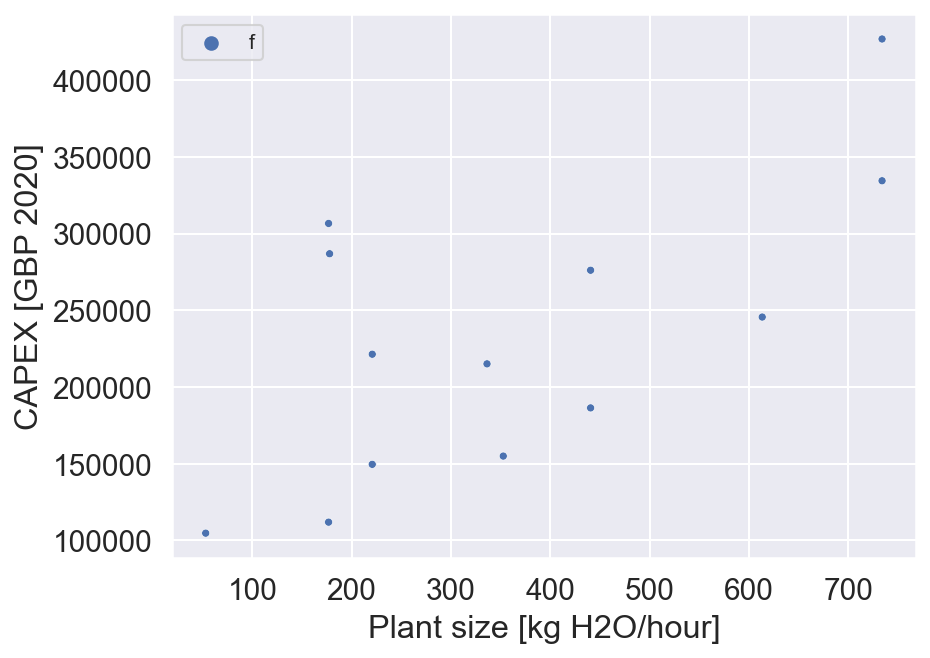

In [20]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_sub_1000, x="Plant size [kg H2O/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference_label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

Straight line fit: R2: 0.443; RMSE: 67057; MAPE: 28 %
Power curve fit: R2: 0.517; RMSE: 62458; MAPE: 29 %
2nd degree polynomial fit: R2: 0.482; RMSE: 64711; MAPE: 29 %
3rd degree polynomial: R2: 0.588; RMSE: 57698; MAPE: 24 %


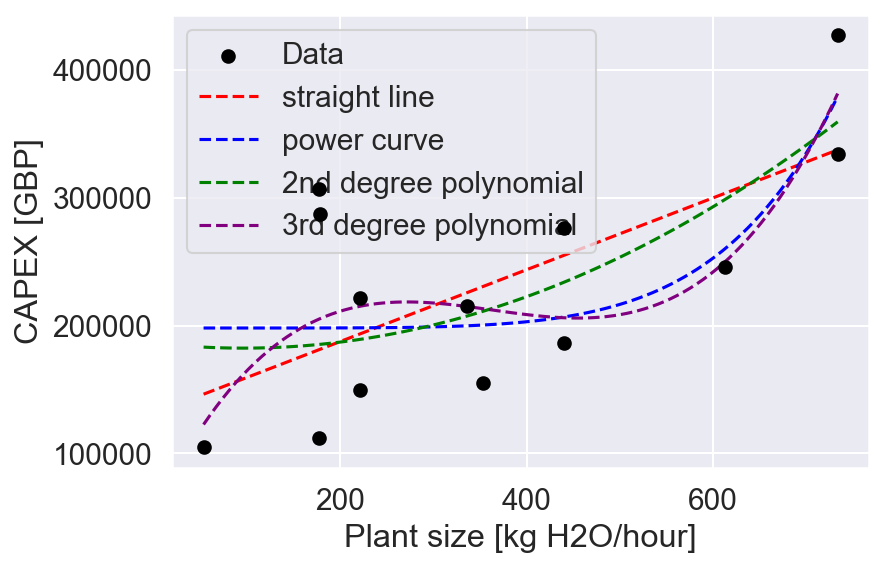

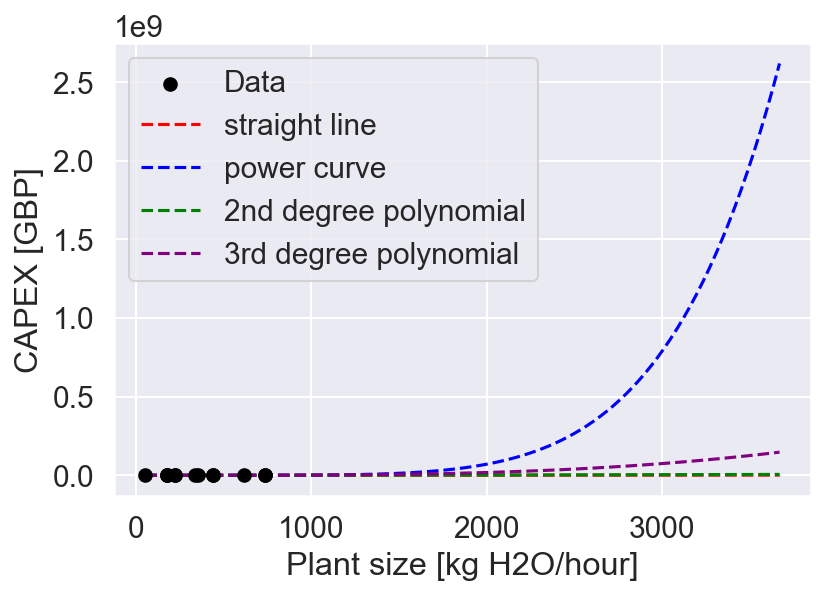

{'straight_line': {'Constants': array([   280.68665043, 131386.315376  ]),
  'R2': 0.4432882098385783,
  'RMSE': 67057.04385730677},
 'power_curve': {'Constants': array([1.58854587e-12, 5.95200494e+00, 1.98078782e+05]),
  'R2': 0.5170286120338466,
  'RMSE': 62458.262150109214},
 '2nd_degree_polynomial': {'Constants': array([-8.30404450e+01,  4.34265562e-01,  1.86304888e+05]),
  'R2': 0.4815657523887992,
  'RMSE': 64710.690820955664},
 '3rd_degree_polynomial': {'Constants': array([ 1.50977071e+03, -4.43898296e+00,  4.07255771e-03,  5.42598727e+04]),
  'R2': 0.5878407968056297,
  'RMSE': 57698.12436490523},
 'data_range': {'min': 53.16, 'max': 734.06}}

In [21]:
display_curve_fits(dataframe=df_sub_1000, x_data_label="Plant size [kg H2O/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


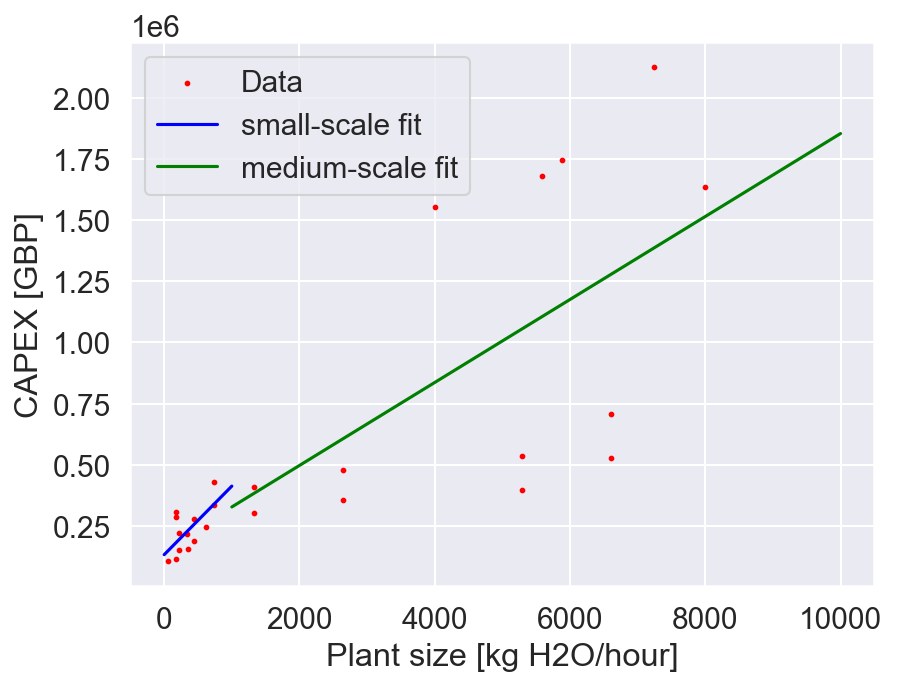

In [22]:
# Display both regression fits in same plot
x_array_sub1000 =np.linspace(start=0, stop=1000, num=100)
x_array_1000_to_10000 = np.linspace(start=1000, stop=10000, num=100)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df_sub_10000["Plant size [kg H2O/hour]"], df_sub_10000["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array_sub1000, func_straight_line(x_array_sub1000, *[280.68665043, 131386.315376]), label="small-scale fit", color="blue")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[169.85378412, 156853.88714613]), label="medium-scale fit", color="green")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


### Use data in 1000 to 10000 range only 

In [53]:
df_1000_to_10000= df_source.copy()
df_1000_to_10000 = df_1000_to_10000[df_1000_to_10000["Ignore"]!= True].copy()
df_1000_to_10000 = df_1000_to_10000[df_1000_to_10000["Plant size [kg H2O/hour]"].between(1000, 10000)]
df_1000_to_10000 = df_1000_to_10000.dropna(subset=['CAPEX_GBP_CEPCI_2020'])
df_1000_to_10000


,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
2,Rotary drum dryer only,2002204.8,USD,8000.0,2016,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Evaluating industrial drying of cellulosic fe...",b,NaN,NaN,1.482263e+06,1.634950e+06
4,Dryer + gas filter,2644800.0,USD,5590.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.649627e+06,1.682861e+06
5,Dryer + gas filter,2743600.0,USD,5880.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.711251e+06,1.745727e+06
6,Dryer + gas blower + gas filter,3344000.0,USD,7240.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,2.085735e+06,2.127756e+06
10,Drum dryer,2116200.0,USD,4000.0,2004,USA,NaN,NaN,Annual Value of 2.46 * 75000 = 184500 USD conv...,Cost benefit of biomass supply and pre-process...,e,NaN,NaN,1.155018e+06,1.553632e+06
24,Vulcan drying systems dryer,375000.0,USD,1320.8,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,3.012071e+05,3.012071e+05
25,Vulcan drying systems dryer,440000.0,USD,2641.6,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,3.534164e+05,3.534164e+05
26,Vulcan drying systems dryer,495000.0,USD,5283.2,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,3.975934e+05,3.975934e+05
27,Vulcan drying systems dryer,654000.0,USD,6604.0,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,5.253052e+05,5.253052e+05
28,Vulcan drying systems dryer,506250.0,USD,1320.8,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,4.066296e+05,4.066296e+05


Straight line fit: R2: 0.366; RMSE: 513197; MAPE: 57 %
Power curve fit: R2: 0.367; RMSE: 512628; MAPE: 56 %
2nd degree polynomial fit: R2: 0.368; RMSE: 512289; MAPE: 56 %
3rd degree polynomial: R2: 0.382; RMSE: 506835; MAPE: 59 %


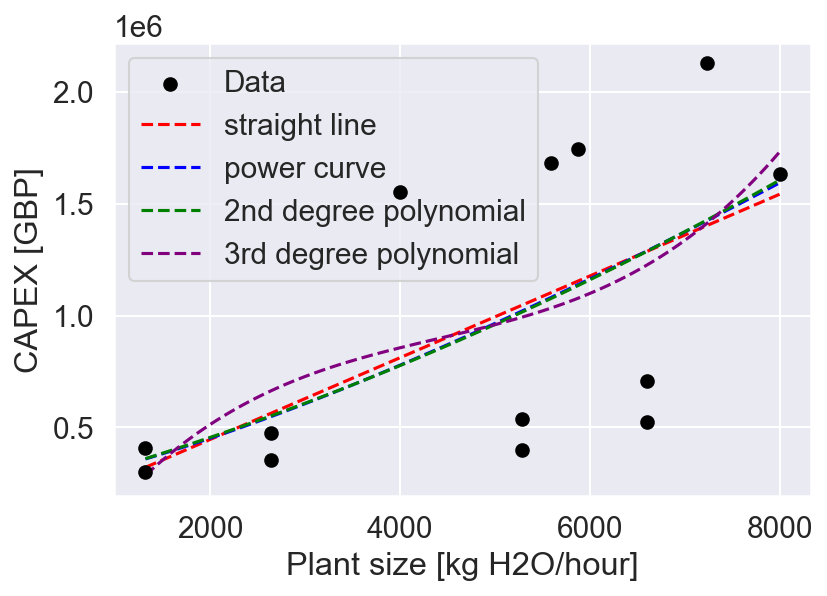

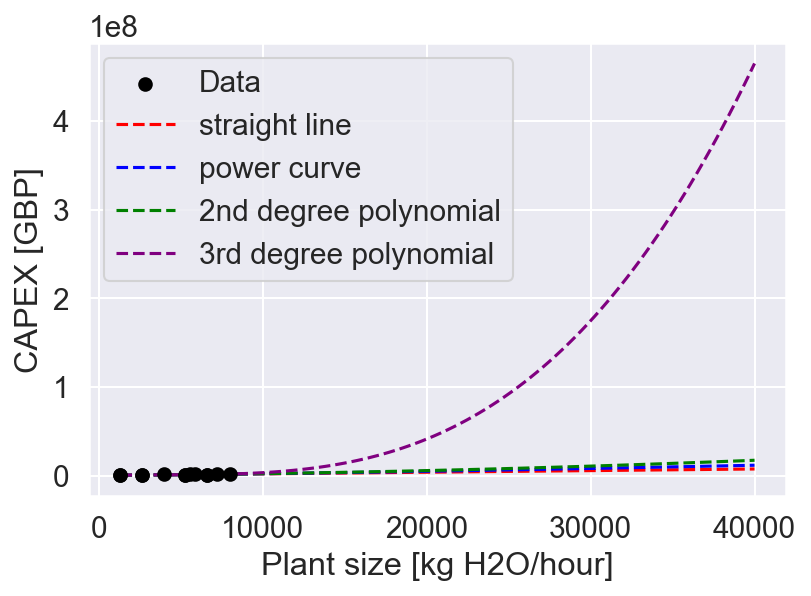

{'straight_line': {'Constants': array([  182.8240798 , 80169.09745238]),
  'R2': 0.3659730147777749,
  'RMSE': 513196.5776262489},
 'power_curve': {'Constants': array([9.59429468e+00, 1.31992861e+00, 2.32994547e+05]),
  'R2': 0.3673781734089073,
  'RMSE': 512627.5777203757},
 '2nd_degree_polynomial': {'Constants': array([1.13699476e+02, 7.80374659e-03, 1.96671565e+05]),
  'R2': 0.36821412537960774,
  'RMSE': 512288.77049312706},
 '3rd_degree_polynomial': {'Constants': array([ 6.96557643e+02, -1.35148120e-01,  1.02160466e-05, -4.21657755e+05]),
  'R2': 0.3815940774630734,
  'RMSE': 506835.1195692206},
 'data_range': {'min': 1320.8, 'max': 8000.0}}

In [54]:
display_curve_fits(dataframe=df_1000_to_10000, x_data_label="Plant size [kg H2O/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


### Consider using only Vulcan drying data (most up to date) for 1000 to 10000 range 

In [50]:
df_1000_to_10000_vulcan = df_source.copy()
df_1000_to_10000_vulcan = df_1000_to_10000_vulcan[df_1000_to_10000_vulcan["Ignore"]!= True].copy()
df_1000_to_10000_vulcan = df_1000_to_10000_vulcan[df_1000_to_10000_vulcan["Plant size [kg H2O/hour]"].between(1000, 10000)]
df_1000_to_10000_vulcan = df_1000_to_10000_vulcan[df_1000_to_10000_vulcan["Reference_label"] == "g"]
df_1000_to_10000_vulcan = df_1000_to_10000_vulcan.dropna(subset=['CAPEX_GBP_CEPCI_2020'])
df_1000_to_10000_vulcan


,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
24,Vulcan drying systems dryer,375000.0,USD,1320.8,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,301207.137084,301207.137084
25,Vulcan drying systems dryer,440000.0,USD,2641.6,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,353416.374178,353416.374178
26,Vulcan drying systems dryer,495000.0,USD,5283.2,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,397593.420951,397593.420951
27,Vulcan drying systems dryer,654000.0,USD,6604.0,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,525305.247074,525305.247074
28,Vulcan drying systems dryer,506250.0,USD,1320.8,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,406629.635063,406629.635063
29,Vulcan drying systems dryer,594000.0,USD,2641.6,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,477112.105141,477112.105141
30,Vulcan drying systems dryer,668250.0,USD,5283.2,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,536751.118283,536751.118283
31,Vulcan drying systems dryer,882900.0,USD,6604.0,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,709162.083550,709162.083550


Straight line fit: R2: 0.578; RMSE: 78114; MAPE: 15 %
Power curve fit: R2: 0.628; RMSE: 73368; MAPE: 15 %
2nd degree polynomial fit: R2: 0.612; RMSE: 74899; MAPE: 15 %
3rd degree polynomial: R2: 0.656; RMSE: 70526; MAPE: 15 %


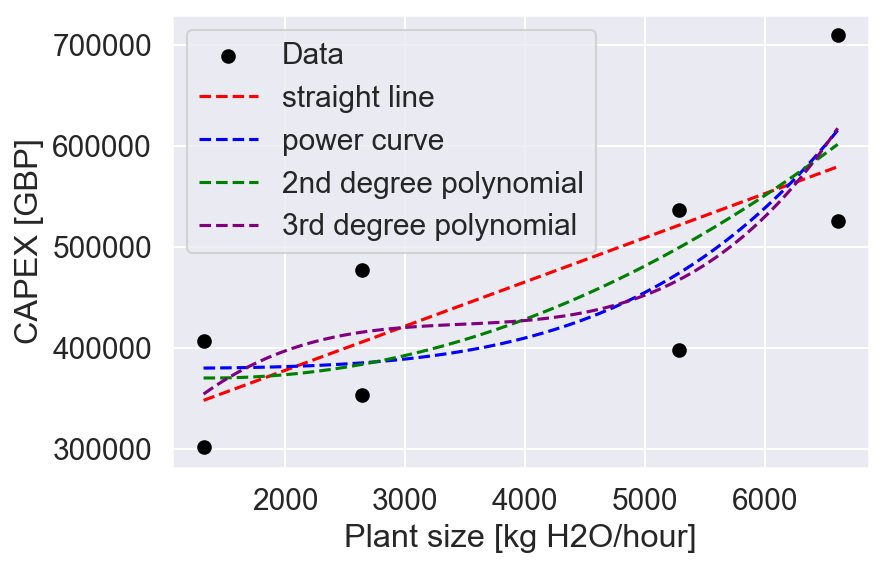

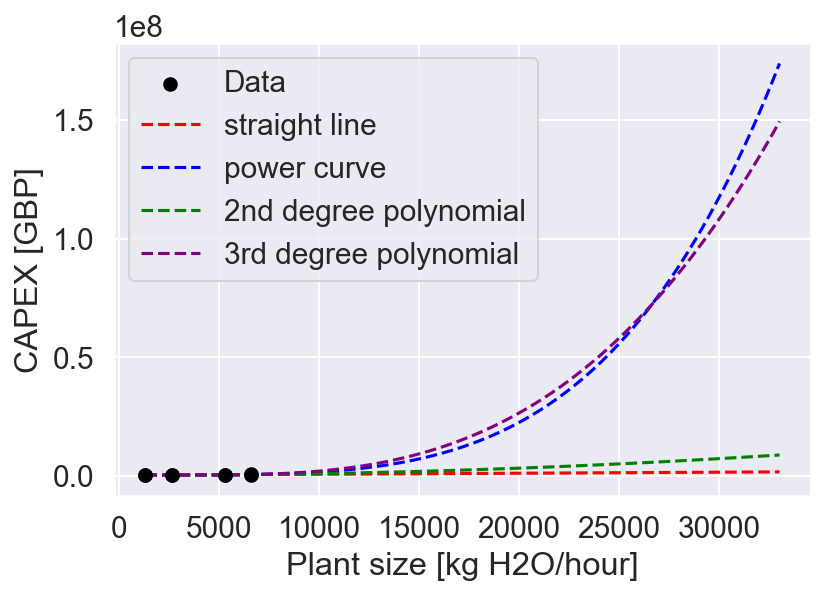

{'straight_line': {'Constants': array([4.38021343e+01, 2.89835563e+05]),
  'R2': 0.578297414685577,
  'RMSE': 78114.17356268148},
 'power_curve': {'Constants': array([5.10195722e-11, 4.10098908e+00, 3.79348438e+05]),
  'R2': 0.6279807640415833,
  'RMSE': 73368.46092384255},
 '2nd_degree_polynomial': {'Constants': array([-2.33659037e+01,  8.47567607e-03,  3.85944070e+05]),
  'R2': 0.6122932735520732,
  'RMSE': 74899.40686112881},
 '3rd_degree_polynomial': {'Constants': array([ 2.14127888e+02, -6.00961486e-02,  5.76854301e-06,  1.62645161e+05]),
  'R2': 0.6562478106768355,
  'RMSE': 70526.0315346504},
 'data_range': {'min': 1320.8, 'max': 6604.0}}

In [51]:
display_curve_fits(dataframe=df_1000_to_10000_vulcan, x_data_label="Plant size [kg H2O/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


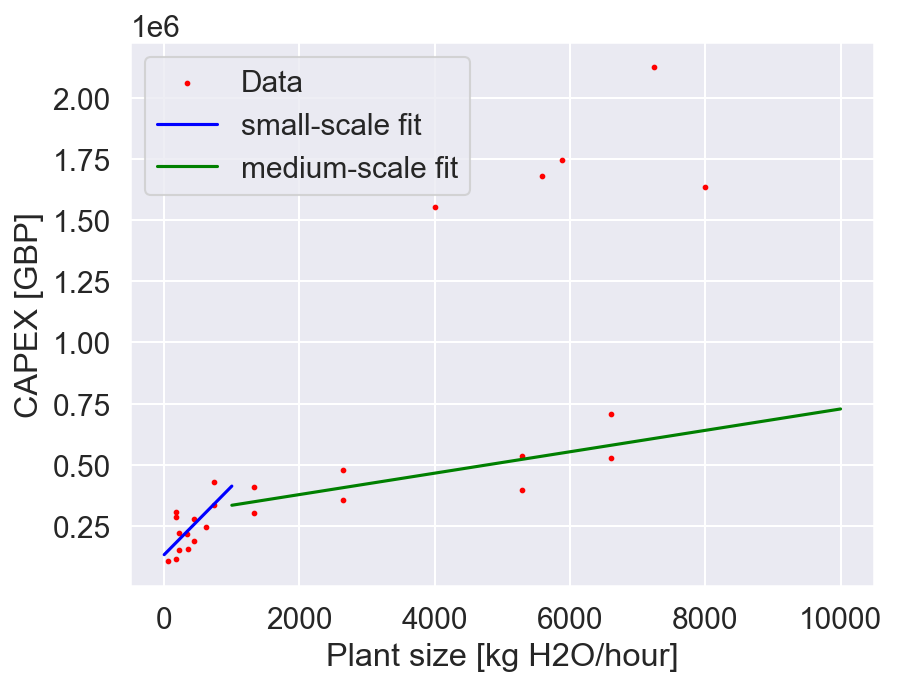

In [36]:
# Display both regression fits in same plot
x_array_sub1000 =np.linspace(start=0, stop=1000, num=100)
x_array_1000_to_10000 = np.linspace(start=1000, stop=10000, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df_sub_10000["Plant size [kg H2O/hour]"], df_sub_10000["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array_sub1000, func_straight_line(x_array_sub1000, *[280.68665043, 131386.315376]), label="small-scale fit", color="blue")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[4.38021343e+01, 2.89835563e+05]), label="medium-scale fit", color="green")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


### Get large scale data set 

In [37]:
df_1000_to_30000 = df_source.copy()
df_1000_to_30000 = df_1000_to_30000[df_1000_to_30000["Ignore"]!= True].copy()
df_1000_to_30000 = df_1000_to_30000[df_1000_to_30000["Plant size [kg H2O/hour]"].between(1000, 30000)]
df_1000_to_30000 = df_1000_to_30000.dropna(subset=['CAPEX_GBP_CEPCI_2020'])
df_1000_to_30000


,Process Reference,CAPEX,Currency,Plant size [kg H2O/hour],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,Reference_label,Ignore,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
2,Rotary drum dryer only,2002204.8,USD,8000.0,2016,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Evaluating industrial drying of cellulosic fe...",b,NaN,NaN,1.482263e+06,1.634950e+06
4,Dryer + gas filter,2644800.0,USD,5590.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.649627e+06,1.682861e+06
5,Dryer + gas filter,2743600.0,USD,5880.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,1.711251e+06,1.745727e+06
6,Dryer + gas blower + gas filter,3344000.0,USD,7240.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,2.085735e+06,2.127756e+06
7,Dryer + gas blower + gas filter,12950400.0,USD,25000.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.077482e+06,8.240218e+06
8,Dryer + gas blower + gas filter,13360800.0,USD,27900.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.333459e+06,8.501352e+06
9,Dryer + gas blower + gas filter,13915600.0,USD,29400.0,2011,USA,NaN,3.8,equipment cost scaled to CAPEX with a factor o...,"""Analysis of the Production Cost for Various G...",d,NaN,NaN,8.679501e+06,8.854366e+06
10,Drum dryer,2116200.0,USD,4000.0,2004,USA,NaN,NaN,Annual Value of 2.46 * 75000 = 184500 USD conv...,Cost benefit of biomass supply and pre-process...,e,NaN,NaN,1.155018e+06,1.553632e+06
24,Vulcan drying systems dryer,375000.0,USD,1320.8,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,3.012071e+05,3.012071e+05
25,Vulcan drying systems dryer,440000.0,USD,2641.6,2023,USA,NaN,NaN,Data kindly provided by Skyler Everts from Vul...,Personal Communications with Skyler Everts fro...,g,NaN,NaN,3.534164e+05,3.534164e+05


C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\curve_fitting\curve_fitting_functions.py:9: RuntimeWarning: overflow encountered in power
  return a * x ** b + c
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\curve_fitting\curve_fitting_functions.py:9: RuntimeWarning: overflow encountered in multiply
  return a * x ** b + c


Straight line fit: R2: 0.965; RMSE: 565453; MAPE: 70 %
Power curve fit: R2: 0.971; RMSE: 515170; MAPE: 48 %
2nd degree polynomial fit: R2: 0.970; RMSE: 526379; MAPE: 51 %
3rd degree polynomial: R2: 0.976; RMSE: 467743; MAPE: 45 %


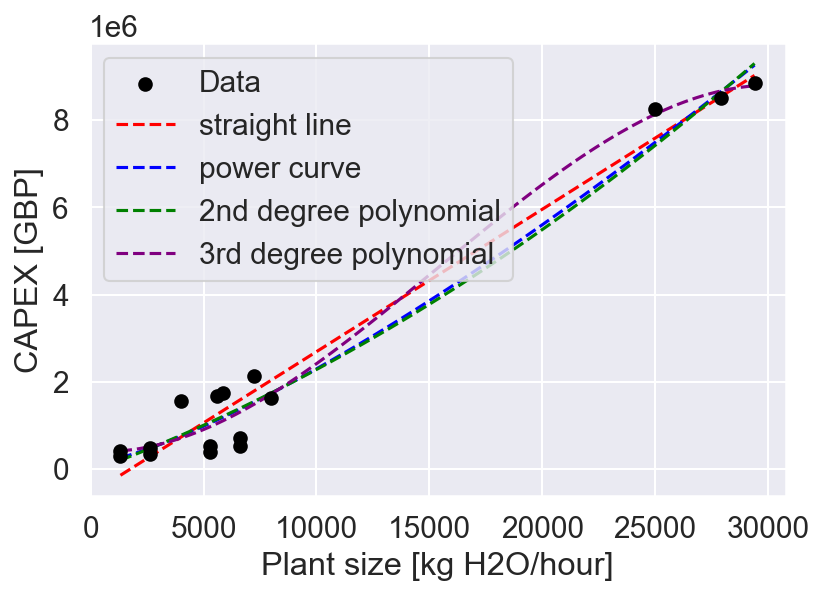

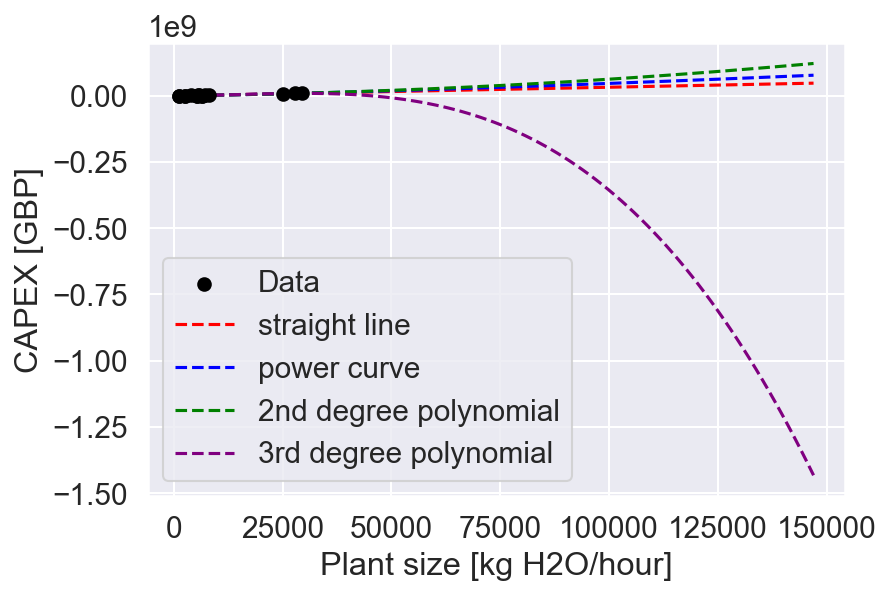

{'straight_line': {'Constants': array([ 3.26310046e+02, -5.73251694e+05]),
  'R2': 0.9648212766170111,
  'RMSE': 565453.2230582238},
 'power_curve': {'Constants': array([1.08893879e+01, 1.32585880e+00, 1.07836301e+05]),
  'R2': 0.9707996764059278,
  'RMSE': 515169.8976650222},
 '2nd_degree_polynomial': {'Constants': array([ 1.90395759e+02,  4.34215054e-03, -5.67912683e+04]),
  'R2': 0.96951521199278,
  'RMSE': 526378.613693289},
 '3rd_degree_polynomial': {'Constants': array([-3.57905994e+01,  3.01422460e-02, -6.54496154e-07,  4.12577346e+05]),
  'R2': 0.9759285867918313,
  'RMSE': 467743.1545911483},
 'data_range': {'min': 1320.8, 'max': 29400.0}}

In [38]:
display_curve_fits(dataframe=df_1000_to_30000, x_data_label="Plant size [kg H2O/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


# Complete fit - using Vulcan Drying system data only for 1,000 to 10,000 range.

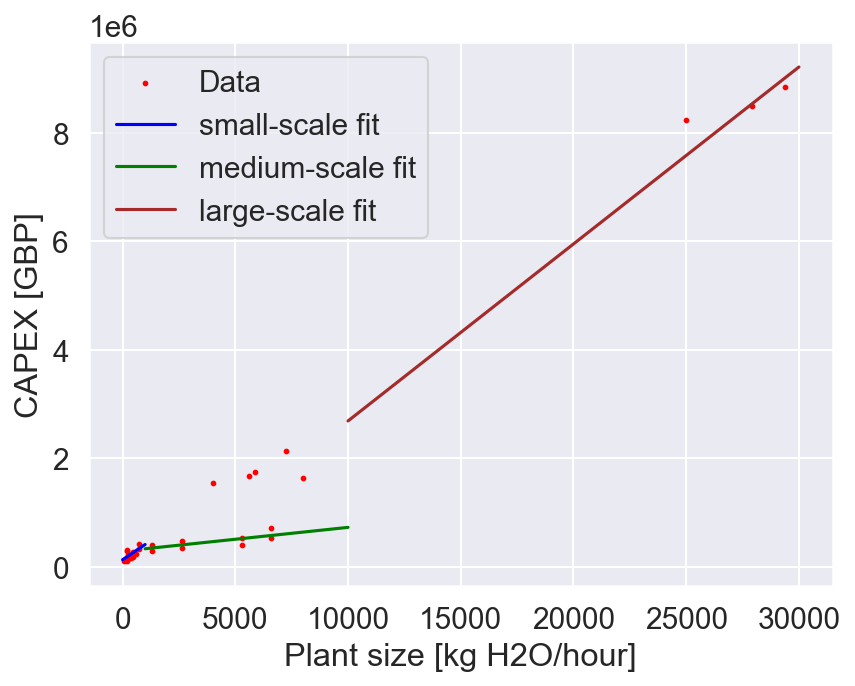

In [49]:
# Display all regression fits in same plot
x_array_sub1000 =np.linspace(start=0, stop=1000, num=100)
x_array_1000_to_10000 = np.linspace(start=1000, stop=10000, num=100)
x_array_10000_to_30000 = np.linspace(start=10000, stop=30000, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df["Plant size [kg H2O/hour]"], df["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array_sub1000, func_straight_line(x_array_sub1000, *[280.68665043, 131386.315376]), label="small-scale fit", color="blue")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[4.38021343e+01, 2.89835563e+05]), label="medium-scale fit", color="green")
ax.plot(x_array_10000_to_30000, func_straight_line(x_array_10000_to_30000, *[ 3.26310046e+02, -5.73251694e+05]), label="large-scale fit", color="brown")
ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


# Complete fit - using general data in 1,000 to 10,000 range.

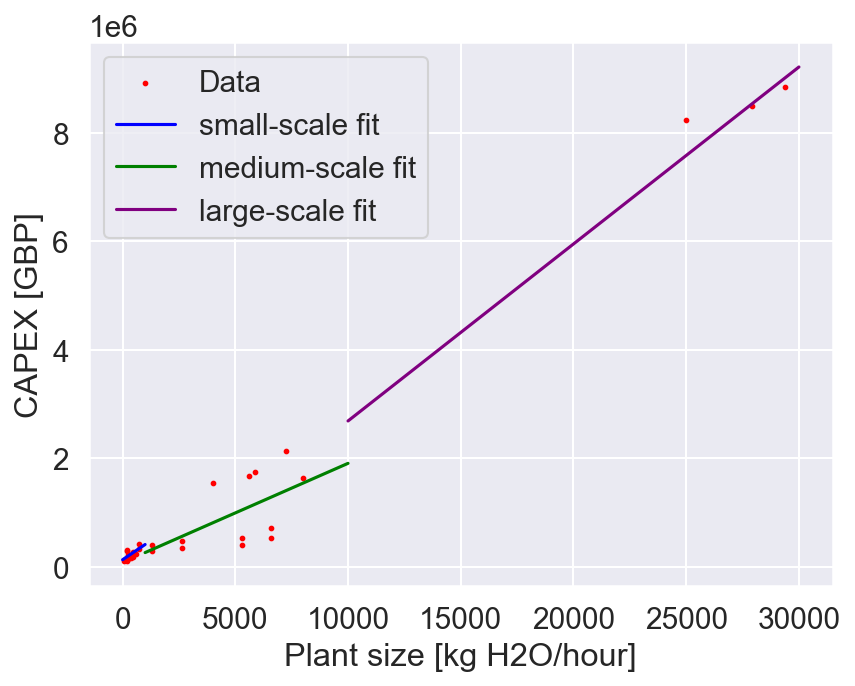

In [57]:
# Display all regression fits in same plot
x_array_sub1000 =np.linspace(start=0, stop=1000, num=100)
x_array_1000_to_10000 = np.linspace(start=1000, stop=10000, num=100)
x_array_10000_to_30000 = np.linspace(start=10000, stop=30000, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df["Plant size [kg H2O/hour]"], df["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array_sub1000, func_straight_line(x_array_sub1000, *[280.68665043, 131386.315376]), label="small-scale fit", color="blue")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[  182.8240798 , 80169.09745238]), label="medium-scale fit", color="green")
ax.plot(x_array_10000_to_30000, func_straight_line(x_array_10000_to_30000, *[ 3.26310046e+02, -5.73251694e+05]), label="large-scale fit", color="purple")

ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


### Show both options for central region

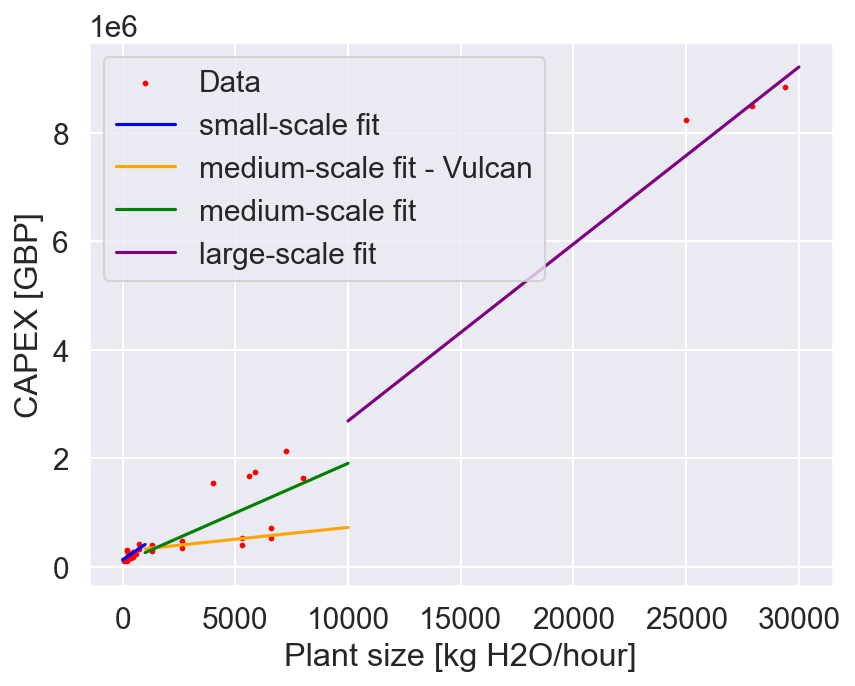

In [60]:
# Display all regression fits in same plot
x_array_sub1000 =np.linspace(start=0, stop=1000, num=100)
x_array_1000_to_10000 = np.linspace(start=1000, stop=10000, num=100)
x_array_10000_to_30000 = np.linspace(start=10000, stop=30000, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df["Plant size [kg H2O/hour]"], df["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array_sub1000, func_straight_line(x_array_sub1000, *[280.68665043, 131386.315376]), label="small-scale fit", color="blue")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[4.38021343e+01, 2.89835563e+05]), label="medium-scale fit - Vulcan", color="orange")
ax.plot(x_array_1000_to_10000, func_straight_line(x_array_1000_to_10000, *[  182.8240798 , 80169.09745238]), label="medium-scale fit", color="green")
ax.plot(x_array_10000_to_30000, func_straight_line(x_array_10000_to_30000, *[ 3.26310046e+02, -5.73251694e+05]), label="large-scale fit", color="purple")

ax.set_xlabel("Plant size [kg H2O/hour]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


# Conclusions

- Splitting model in 3 sections seems to make the most sense. 
- Have two reasonable approaches.
    - Using Vulcan Drying data only causes a larger error in boundary region at around 10,000 kg H2O/hour.
    - But this is the most up-to-date data, and directly from manufacturer.
    - Hence, use their data to model the central region between 1,000 and 10,000 kg H2O/hour.
